In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Sachin Kamath/Downloads/Iris_spark.csv')

In [4]:
#Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [5]:
# Display the first few rows of the dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
#dataset appears to be clean, so there might not be much preprocessing needed.
#we might not need to perform feature selection because you want to cluster the data based on all the features.

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("Species", axis=1))


C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\sit

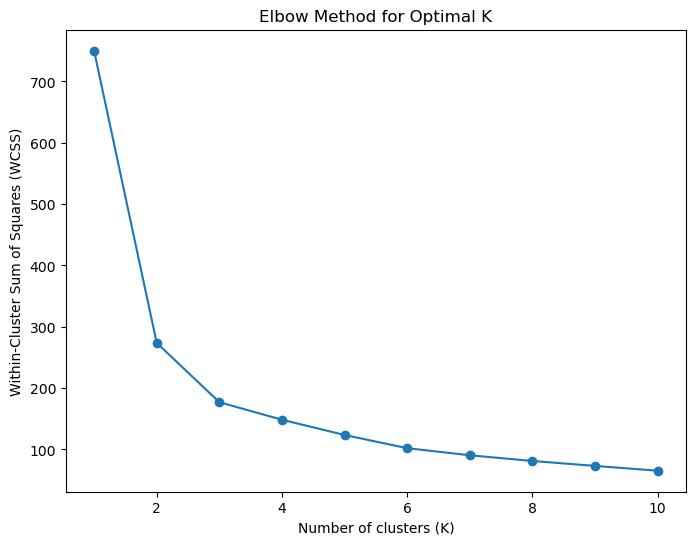

In [8]:
wcss = []  # List to store the within-cluster sum of squares

# Try K values from 1 to 10 and calculate WCSS for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()


In [9]:
# Choose the optimal number of clusters (e.g., 3)
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_


C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


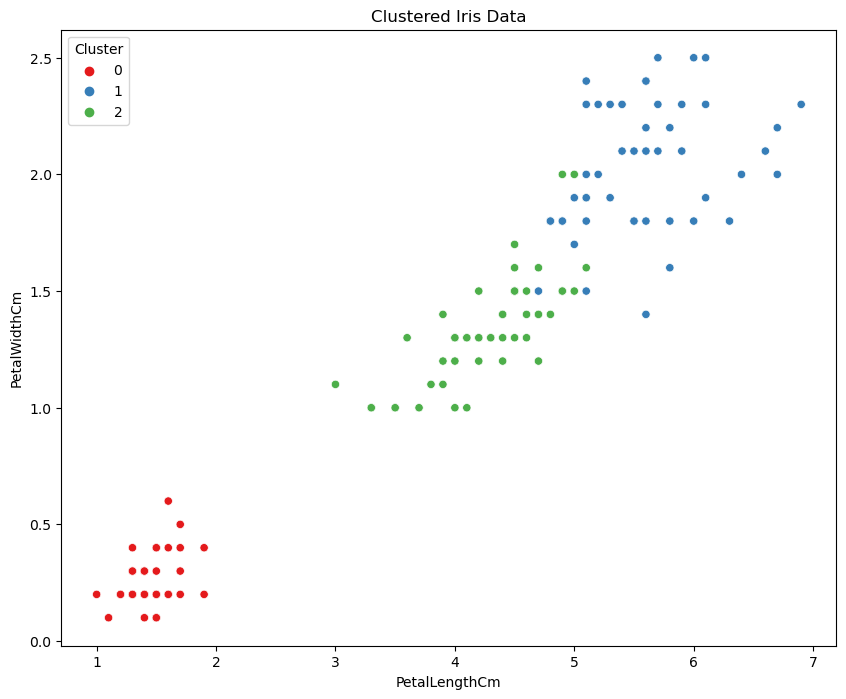

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Cluster", data=df, palette="Set1")
plt.title("Clustered Iris Data")
plt.show()
